In [43]:
%matplotlib inline

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [96]:
df = pd.read_csv('../data/hour.csv')

In [97]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [98]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [99]:
df.shape

(17379, 17)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [101]:
import pandas as pd

def convert_columns_to_categorical(df, columns):
    """
    Convert specified columns in the DataFrame to categorical type.
    df: DataFrame
    columns: list of column names to convert to categorical
    Returns the updated DataFrame with converted columns.
    """
    df = df.copy()  # Create a copy of the DataFrame
    
    for column in columns:
        df[column] = df[column].astype('category')
    
    return df


In [102]:
# Specify the columns to convert to categorical
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Call the function to convert the columns
df_updated = convert_columns_to_categorical(df, categorical_columns)

# Select the categorical columns from the DataFrame
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Generate descriptive statistics for the categorical columns
categorical_stats = df[categorical_columns].describe()

# Print the descriptive statistics
print(categorical_stats)


             season            yr          mnth       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775      0.028770      3.003683   
std        1.106918      0.500008      3.438776      0.167165      2.005771   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      0.000000      1.000000   
50%        3.000000      1.000000      7.000000      0.000000      3.000000   
75%        3.000000      1.000000     10.000000      0.000000      5.000000   
max        4.000000      1.000000     12.000000      1.000000      6.000000   

         workingday    weathersit  
count  17379.000000  17379.000000  
mean       0.682721      1.425283  
std        0.465431      0.639357  
min        0.000000      1.000000  
25%        0.000000      1.000000  
50%        1.000000      1.000000  
75%        1.000000      2.000000  


In [103]:
df.isna().sum()   #null value check

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [105]:
import pandas as pd

def histogram_boxplot_df(df, exclude=[], font_scale=2, figsize=(15,7), bins=None):
    """
    Function to iterate through all numerical columns of a DataFrame (excluding the ones in 'exclude') 
    and create a boxplot and histogram combined for each
    
    df: pandas DataFrame
    exclude: list of column names to exclude
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (15,7))
    bins: number of bins (default None / auto)
    """
    # Identify numeric columns in dataframe
    num_columns = df.select_dtypes(include=[np.number]).columns

    # Exclude unwanted columns
    num_columns = [col for col in num_columns if col not in exclude]

    # Generate histogram and boxplot for each numerical column
    for col in num_columns:
        data = df[col]
        title = "Histogram and Boxplot for " + col
        xlabel = col

        histogram_boxplot(data, xlabel=xlabel, title=title, font_scale=font_scale, figsize=figsize, bins=bins)


In [106]:
histogram_boxplot_df(df, exclude=categorical_columns)


NameError: name 'histogram_boxplot' is not defined

In [107]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

NameError: name 'ax' is not defined

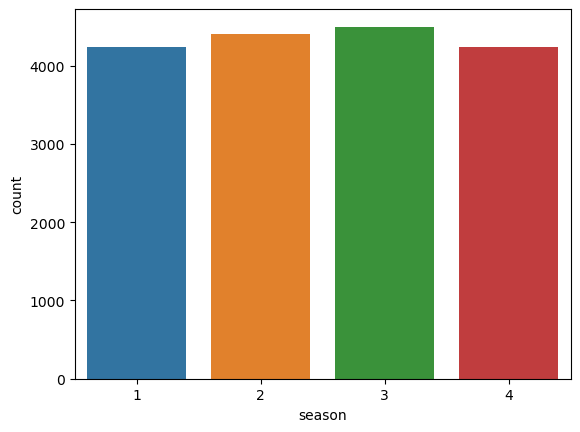

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
sns.countplot(x='season', data=df)

# Call the function to add percentage labels
perc_on_bar(plt.gca(), df['season'].value_counts())


In [109]:
import pandas as pd

value_counts = df['season'].value_counts()
total_sum = value_counts.sum()

print("Count of each category in the 'season' column:")
print(value_counts)

print("\nTotal count of all categories:")
print(total_sum)


Count of each category in the 'season' column:
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

Total count of all categories:
17379


In [110]:
import pandas as pd

# Group the data by 'season'
grouped = df.groupby('season')

# Display the grouped data
for season, data in grouped:
    print(f"Season: {season}")
    print(data)
    print()


Season: 1
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1    

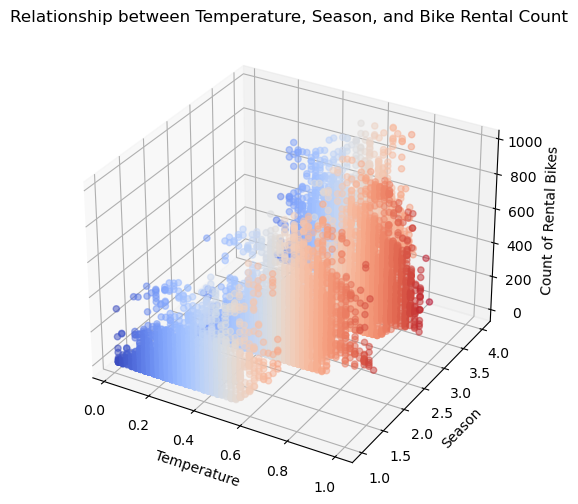

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert 'season' to integer type
df['season'] = df['season'].astype(int)

# Scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points with different colors for 'temp' and 'season'
ax.scatter(df['temp'], df['season'], df['cnt'], c=df['temp'], cmap='coolwarm', alpha=0.5)

# Set labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Season')
ax.set_zlabel('Count of Rental Bikes')
ax.set_title('Relationship between Temperature, Season, and Bike Rental Count')

plt.show()


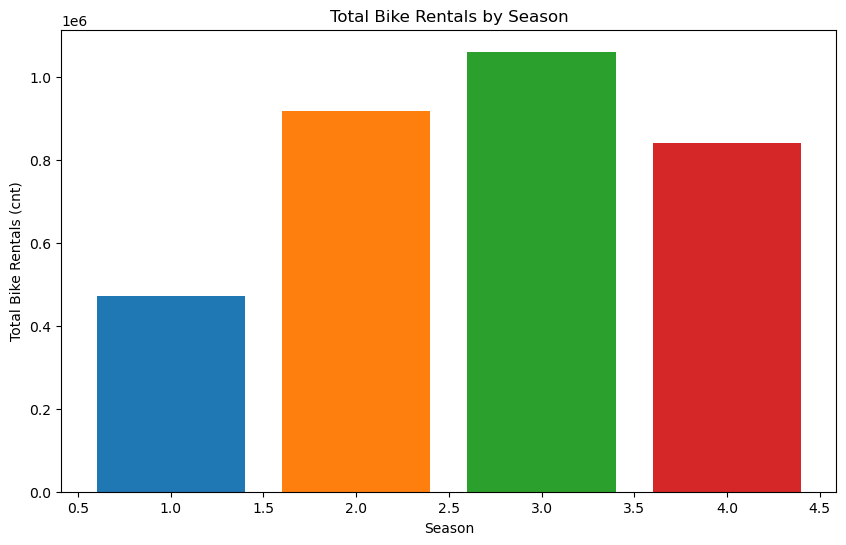

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'season'
grouped = df.groupby('season')

# Plot 'cnt' values for each season
plt.figure(figsize=(10, 6))
for season, data in grouped:
    plt.bar(season, data['cnt'].sum())

plt.xlabel('Season')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Total Bike Rentals by Season')
plt.show()


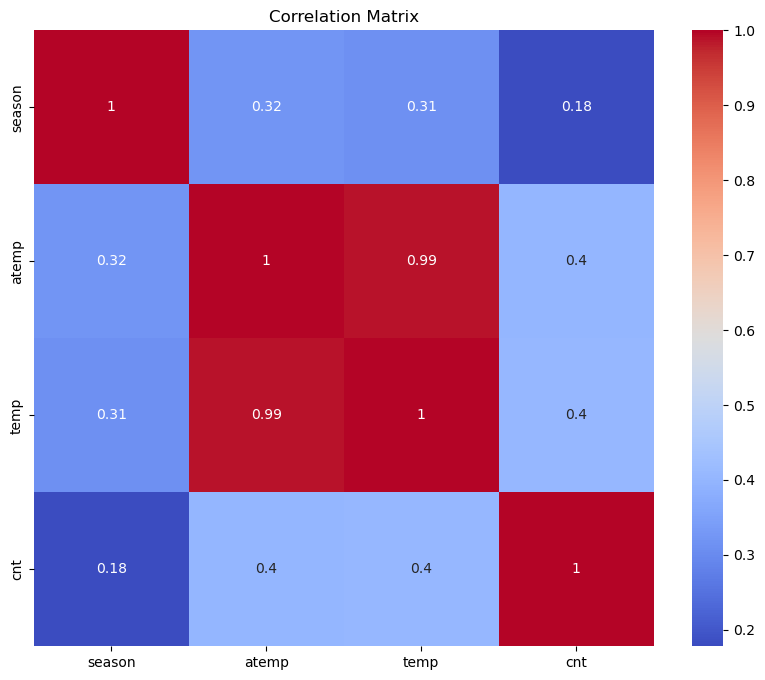

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
columns = ['season', 'atemp', 'temp', 'cnt']

# Create a subset of the DataFrame with selected columns
subset = df[columns]

# Compute the correlation matrix
correlation_matrix = subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [77]:
import pandas as pd

# Assuming 'df' is your DataFrame
grouped = df.groupby('season')['cnt'].sum().reset_index()
total_sum = grouped['cnt'].sum()

print("Sum of 'cnt' for each value in the 'season' column:")
print(grouped)

print("\nTotal sum of 'cnt' for all values:")
print(total_sum)


Sum of 'cnt' for each value in the 'season' column:
   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613

Total sum of 'cnt' for all values:
3292679


In [78]:
import pandas as pd

# Assuming 'df' is your DataFrame
grouped1 = df.groupby('season')['cnt'].mean().reset_index()
total_mean = grouped['cnt'].mean()

print("Mean of 'cnt' for each value in the 'season' column:")
print(grouped1)

print("\nOverall mean of 'cnt' for all values:")
print(total_mean)


Mean of 'cnt' for each value in the 'season' column:
   season         cnt
0       1  111.114569
1       2  208.344069
2       3  236.016237
3       4  198.868856

Overall mean of 'cnt' for all values:
823169.75


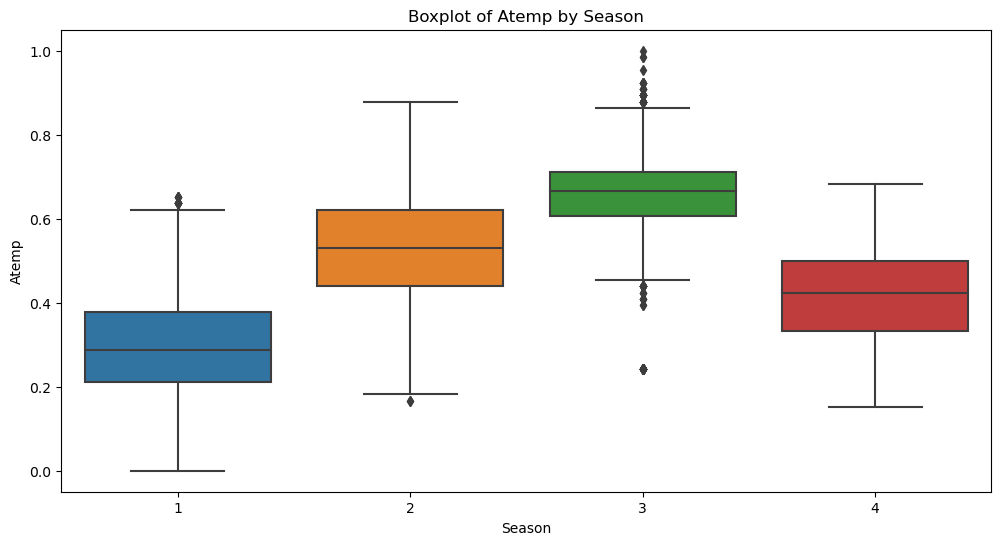

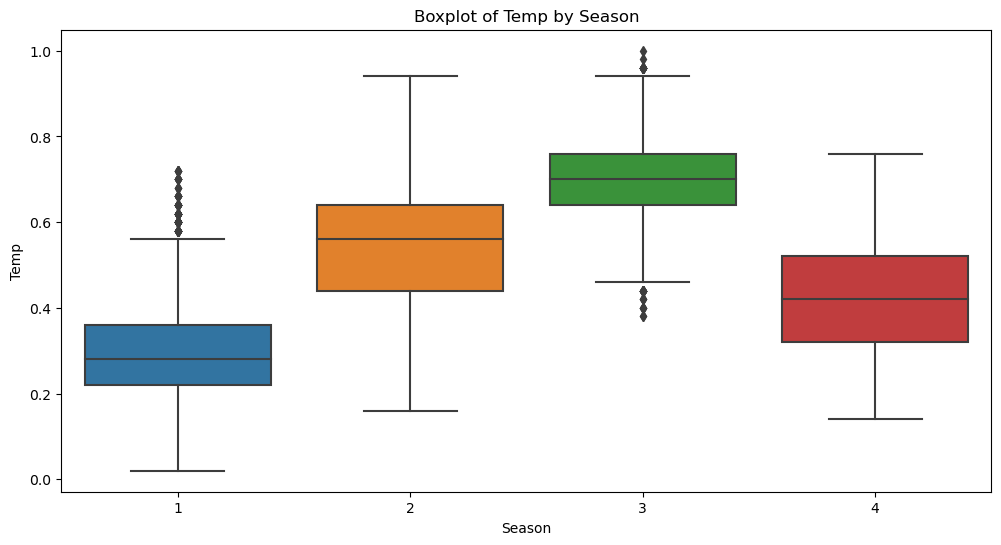

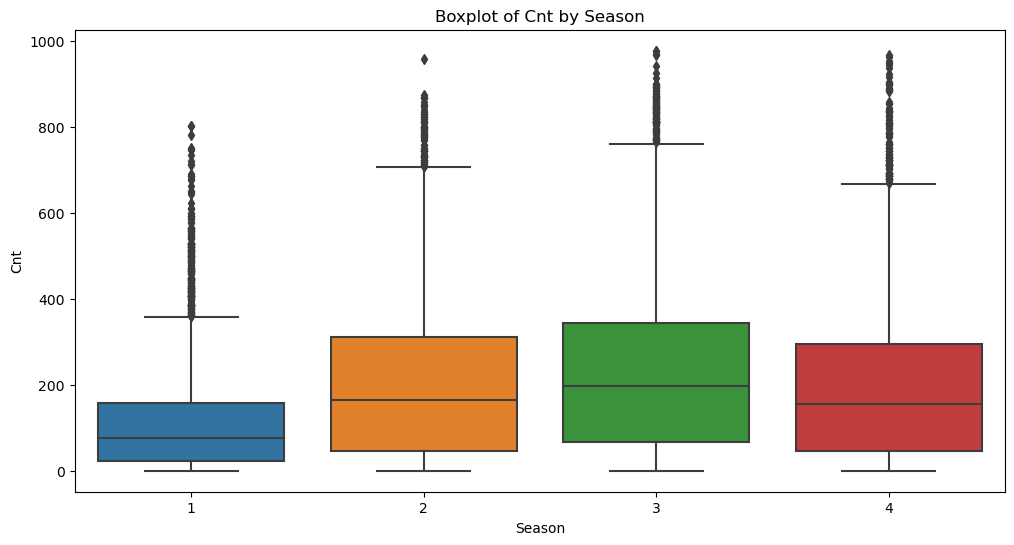

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for 'atemp', 'temp', and 'cnt' grouped by 'season'
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='atemp', data=df)
plt.title('Boxplot of Atemp by Season')
plt.xlabel('Season')
plt.ylabel('Atemp')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='temp', data=df)
plt.title('Boxplot of Temp by Season')
plt.xlabel('Season')
plt.ylabel('Temp')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Boxplot of Cnt by Season')
plt.xlabel('Season')
plt.ylabel('Cnt')
plt.show()


C:\Users\eterp\AppData\Local\Temp\ipykernel_23732\1730717852.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10})


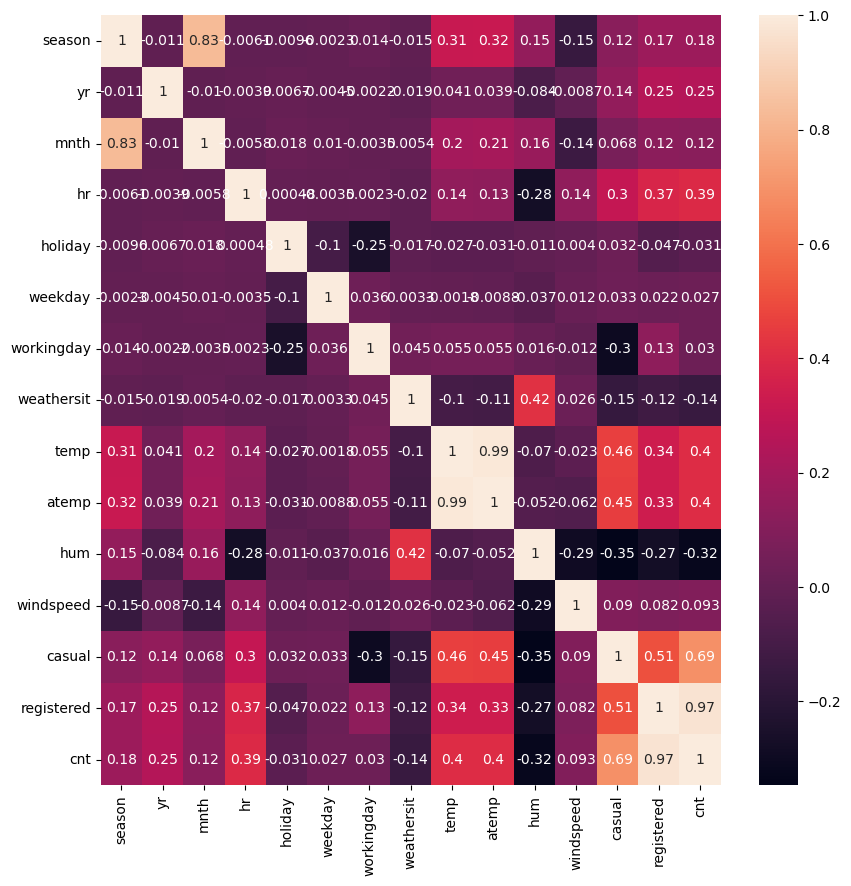

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop('instant', axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 10})
plt.show()


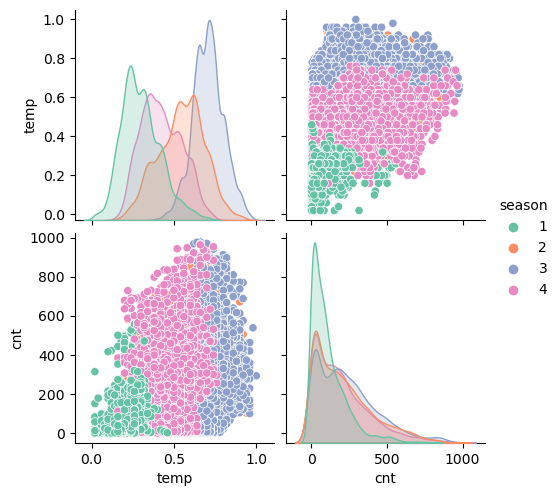

In [153]:
columns = df[['temp', 'season', 'cnt']]
sns.pairplot(columns, hue='season', palette='Set2')  # pairplot with Set2 color palette
plt.show()


<Axes: xlabel='season'>

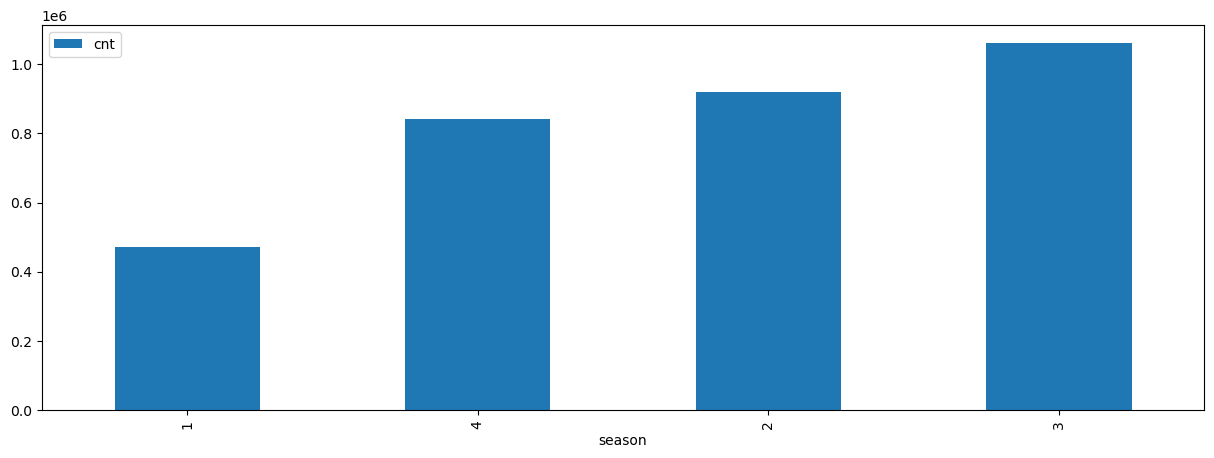

In [21]:
df.groupby(by=['season'])['cnt'].sum().reset_index().sort_values(['cnt']).tail(10).plot(x='season', y='cnt',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))


C:\Users\eterp\AppData\Local\Temp\ipykernel_23732\3753181288.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', center=1)


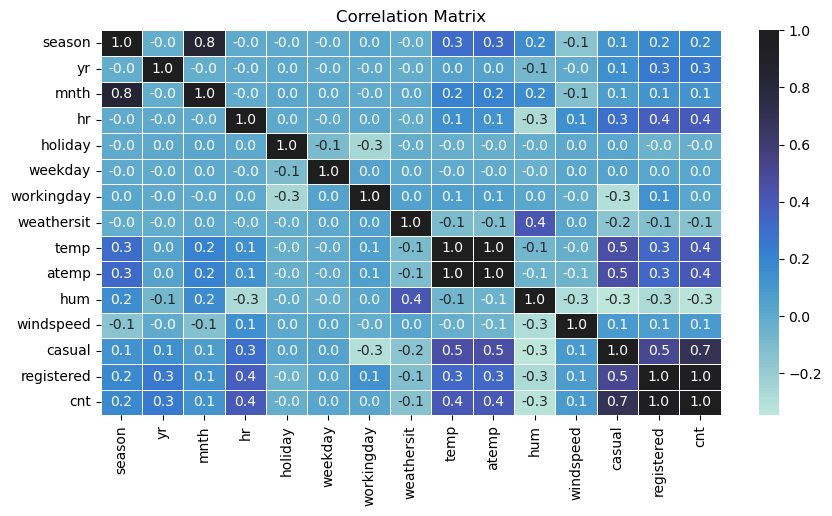

In [133]:
# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', center=1)
plt.title('Correlation Matrix')
plt.show()

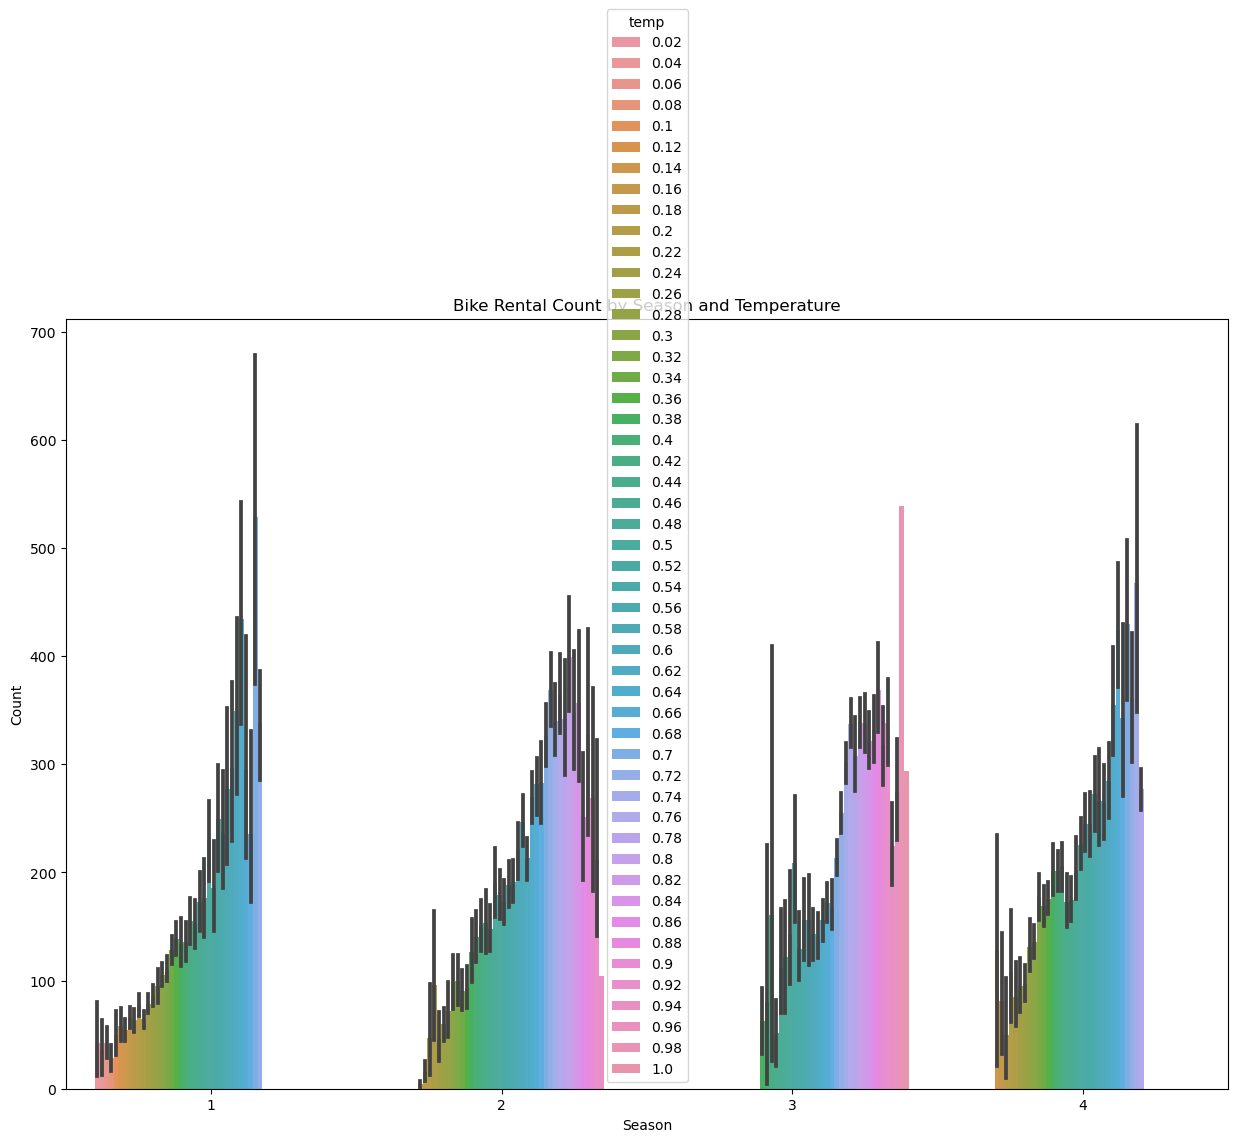

In [141]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='season', y='cnt', hue='temp')
plt.title('Bike Rental Count by Season and Temperature')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


In [19]:
from sklearn.preprocessing import OneHotEncoder

# Select the "season" column for encoding
season_data = df[["season"]]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(season_data)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original "season" column
df_encoded = df_encoded.drop("season", axis=1)

# Display the encoded DataFrame
print(df_encoded.head())


   instant      dteday  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01   0     1   0        0        6           0   
1        2  2011-01-01   0     1   1        0        6           0   
2        3  2011-01-01   0     1   2        0        6           0   
3        4  2011-01-01   0     1   3        0        6           0   
4        5  2011-01-01   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt    1  \
0           1  0.24  0.2879  0.81        0.0       3          13   16  1.0   
1           1  0.22  0.2727  0.80        0.0       8          32   40  1.0   
2           1  0.22  0.2727  0.80        0.0       5          27   32  1.0   
3           1  0.24  0.2879  0.75        0.0       3          10   13  1.0   
4           1  0.24  0.2879  0.75        0.0       0           1    1  1.0   

     2    3    4  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.

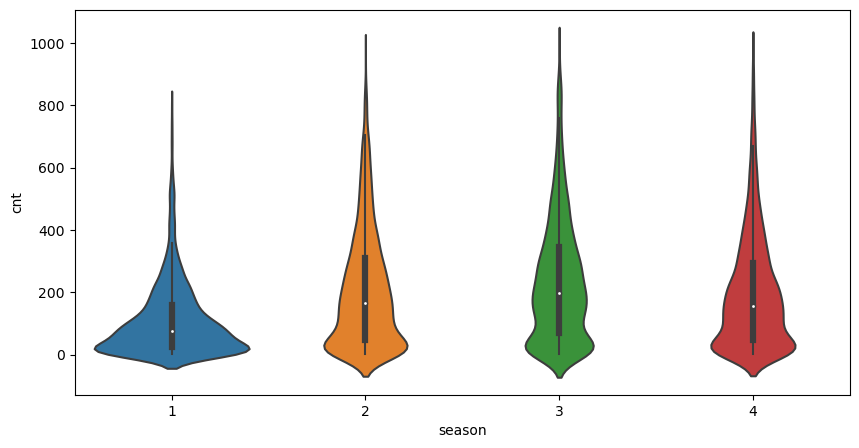

In [148]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.season, y=df['cnt'])
plt.show()

# Conduct an ANOVA test on the data

In [156]:
from scipy import stats

# Select the data for each season
season1 = df[df['season'] == 1]['cnt']
season2 = df[df['season'] == 2]['cnt']
season3 = df[df['season'] == 3]['cnt']
season4 = df[df['season'] == 4]['cnt']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(season1, season2, season3, season4)

# Print the results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


ANOVA results:
F-statistic: 409.1810372630525
p-value: 7.40107139971279e-257


The ANOVA test results indicate a significant relationship between the 'season' variable and the 'cnt' variable. The F-statistic is 409.1810372630525, and the p-value is very small (7.40107139971279e-257), suggesting strong evidence against the null hypothesis of no association.

This indicates that the 'season' variable has a significant impact on the 'cnt' variable, and there are likely differences in the mean counts of bike rentals across different seasons.

# Conduct a t test:
H0: There is no significant difference in the mean bike rental counts between the seasons.

Rejecting the null hypothesis would indicate that there is a significant difference in the mean bike rental counts between at least one pair of seasons.

In [157]:
import scipy.stats as stats

# Define the seasons and corresponding subsets of 'cnt' variable
seasons = df['season'].unique()

# Perform pairwise t-tests between each season and 'cnt'
for season in seasons:
    season_data = df[df['season'] == season]['cnt']
    _, p_value = stats.ttest_ind(season_data, df['cnt'])
    print(f"Season: {season} | p-value: {p_value}")


Season: 1 | p-value: 3.4509642647585406e-155
Season: 2 | p-value: 9.24999633777696e-10
Season: 3 | p-value: 6.144586704479224e-51
Season: 4 | p-value: 0.0025315864887008985


With a significance level of 95% (α = 0.05), we compare the obtained p-values with the chosen significance level to determine the statistical significance. 

Based on the t-tests conducted, the p-values are as follows:

Season 1 vs 'cnt': p-value = 3.4509642647585406e-155 (significant)
Season 2 vs 'cnt': p-value = 9.24999633777696e-10 (significant)
Season 3 vs 'cnt': p-value = 6.144586704479224e-51 (significant)
Season 4 vs 'cnt': p-value = 0.0025315864887008985 (significant)

Since all p-values are much smaller than the significance level of 0.05, we can conclude that there is strong evidence to reject the null hypothesis. This means that there is a statistically significant difference between each season and the 'cnt' variable at the 95% confidence level.

In other words, we can confidently state that the different seasons have a significant impact on the bike rental counts.